<a href="https://colab.research.google.com/github/Rami-Alkadi/Ai-DataScience/blob/main/Analysis/CleaningAndAnalyzingMediaSurveyData_Rami.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## R - Qualtrics Survey Cleaning


In [257]:
library(dplyr)
library(ggplot2)
#install.packages("ggthemes")
library(ggthemes)
# Install Package to clean Qualtrics data
library(excluder)

**Inserting Data**

In [144]:
#Insert data
survey<-read.csv("/content/Survey-char.csv",header = TRUE, sep = ",")
head(survey)
# Data dimensions
nrow(survey)
ncol(survey)

,StartDate,EndDate,Status,IPAddress,Progress,Duration..in.seconds.,Finished,RecordedDate,ResponseId,RecipientLastName,⋯,Q17.1,Q17.2,Q17.3,Q17.4,Q17.5_1,Q17.5_2,Q17.5_3,Q17.5_4,Q17.5_5,Q18.1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,⋯,I intend to use AI to automate repetitive tasks,I intend to use AI to assist me with creative tasks,I intend to use AI in my learning activities,I intend to stay informed about emerging AI technologies,How much do you agree with the following statements? - I intend to use AI to automate repetitive tasks in the future,How much do you agree with the following statements? - I intend to use AI to assist me with creative tasks in the future,How much do you agree with the following statements? - I intend to use AI in my learning activities in the future,How much do you agree with the following statements? - I intend to stay informed of emerging AI technologies in the future,How much do you agree with the following statements? - I intend to work with AI in my future career,"If you would like to take part in the GIVEAWAY of an Amazon gift card or a BUas hoodie, please enter your student number."
2,"{""ImportId"":""startDate"",""timeZone"":""America/Denver""}","{""ImportId"":""endDate"",""timeZone"":""America/Denver""}","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America/Denver""}","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",⋯,"{""ImportId"":""QID33""}","{""ImportId"":""QID36""}","{""ImportId"":""QID34""}","{""ImportId"":""QID35""}","{""ImportId"":""QID81_1""}","{""ImportId"":""QID81_2""}","{""ImportId"":""QID81_3""}","{""ImportId"":""QID81_4""}","{""ImportId"":""QID81_5""}","{""ImportId"":""QID87_TEXT""}"
3,2022-09-21 02:45:52,2022-09-21 02:46:02,Survey Preview,,100,9,True,2022-09-21 02:46:03,R_ODzLennzv91wiNH,,⋯,,,,,,,,,,
4,2022-09-21 09:24:26,2022-09-21 09:25:16,Survey Preview,,100,50,True,2022-09-21 09:25:17,R_10I51x8wDDOebEm,,⋯,,,,,,,,,,
5,2022-09-22 06:28:30,2022-09-22 06:28:42,Survey Preview,,100,11,True,2022-09-22 06:28:43,R_1jwieeD6Ueq9Ttw,,⋯,,,,,,,,,,
6,2022-09-23 03:11:59,2022-09-23 03:12:33,Survey Preview,,100,34,True,2022-09-23 03:12:34,R_1IcJOQFnyyP54xU,,⋯,,,,,,,,,,


[1] 341

[1] 54

In [145]:
#changing col name
colnames(survey)
names(survey)[6] <- "Duration_seconds"


[1] "StartDate"             "EndDate"               "Status"               
 [4] "IPAddress"             "Progress"              "Duration..in.seconds."
 [7] "Finished"              "RecordedDate"          "ResponseId"           
[10] "RecipientLastName"     "RecipientFirstName"    "RecipientEmail"       
[13] "ExternalReference"     "LocationLatitude"      "LocationLongitude"    
[16] "DistributionChannel"   "UserLanguage"          "Q2.1"                 
[19] "Q4.1"                  "Q4.2"                  "Q4.3"                 
[22] "Q4.4"                  "Q4.5"                  "Q7.2"                 
[25] "Q7.3"                  "Q9.2"                  "Q10.2"                
[28] "Q10.3_1"               "Q10.3_2"               "Q10.3_3"              
[31] "Q10.3_4"               "Q10.3_5"               "Q13.1"                
[34] "Q13.2"                 "Q13.3"                 "Q13.4"                
[37] "Q13.5"                 "Q14.1"                 "Q14.2"                
[40] "Q14.3"                 "Q14.4"                 "Q16.1"                
[43] "Q16.2"                 "Q16.3"                 "Q17.1"                
[46] "Q17.2"                 "Q17.3"                 "Q17.4"                
[49] "Q17.5_1"               "Q17.5_2"               "Q17.5_3"              
[52] "Q17.5_4"               "Q17.5_5"               "Q18.1"

In [146]:
# Delete first 2 rows
#colnames(survey) <- survey[1,]
survey <- survey[-1,]
survey <- survey[-1,]
#head(data)
#survey <-remove_label_rows(survey, convert = TRUE, rename = FALSE) # Structure the dataset
head(survey,3) # Show first 3 rows

,StartDate,EndDate,Status,IPAddress,Progress,Duration_seconds,Finished,RecordedDate,ResponseId,RecipientLastName,⋯,Q17.1,Q17.2,Q17.3,Q17.4,Q17.5_1,Q17.5_2,Q17.5_3,Q17.5_4,Q17.5_5,Q18.1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
3,2022-09-21 02:45:52,2022-09-21 02:46:02,Survey Preview,,100,9,True,2022-09-21 02:46:03,R_ODzLennzv91wiNH,,⋯,,,,,,,,,,
4,2022-09-21 09:24:26,2022-09-21 09:25:16,Survey Preview,,100,50,True,2022-09-21 09:25:17,R_10I51x8wDDOebEm,,⋯,,,,,,,,,,
5,2022-09-22 06:28:30,2022-09-22 06:28:42,Survey Preview,,100,11,True,2022-09-22 06:28:43,R_1jwieeD6Ueq9Ttw,,⋯,,,,,,,,,,


## Cleaning Process

In [153]:
#Exclude the Survey Prev
survey <- survey[!(survey$`Status` == "Survey Preview"),] # Delete rows where the preview was used to fill survey in

# Not finished
survey <- survey[!(survey$Finished == FALSE),] # Delete rows where the respondent did not finish the survey



# Exclude less than 45 finished
survey$Duration_seconds <- as.numeric(as.character(survey$Duration_seconds)) # Change column "Duration..in.seconds." to numeric for next step

survey <- survey[(survey$`Duration_seconds` > 45),] # Delete rows survey is finished in less than 45 seconds


In [154]:
head(survey,5)

,StartDate,EndDate,Status,IPAddress,Progress,Duration_seconds,Finished,RecordedDate,ResponseId,RecipientLastName,⋯,Q17.1,Q17.2,Q17.3,Q17.4,Q17.5_1,Q17.5_2,Q17.5_3,Q17.5_4,Q17.5_5,Q18.1
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
19,2022-09-28 03:35:59,2022-09-28 03:40:15,IP Address,145.101.194.168,100,256,True,2022-09-28 03:40:15,R_3oGRiHiwYWHT46c,,⋯,Somewhat agree,Somewhat disagree,Somewhat agree,Strongly agree,Somewhat agree,Somewhat disagree,Somewhat agree,Strongly agree,Neither agree nor disagree,211552
20,2022-09-28 03:44:45,2022-09-28 03:50:05,IP Address,145.101.196.134,100,320,True,2022-09-28 03:50:05,R_cvbMMuNJjksgzgl,,⋯,Somewhat agree,Neither agree nor disagree,Somewhat disagree,Somewhat disagree,Somewhat agree,Neither agree nor disagree,Somewhat disagree,Somewhat disagree,Somewhat disagree,212803
22,2022-09-28 03:58:39,2022-09-28 04:02:24,IP Address,77.165.73.201,100,225,True,2022-09-28 04:02:25,R_6XMEu9dKNqGwxm9,,⋯,Neither agree nor disagree,Strongly disagree,Neither agree nor disagree,Somewhat disagree,Neither agree nor disagree,Somewhat disagree,Strongly disagree,Strongly disagree,Somewhat disagree,212169
23,2022-09-28 04:03:51,2022-09-28 04:08:35,IP Address,145.101.205.93,100,283,True,2022-09-28 04:08:35,R_27CB2RZHwgbJ0I1,,⋯,Strongly agree,Somewhat agree,Somewhat agree,Somewhat agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Neither agree nor disagree,202109
24,2022-09-28 04:07:02,2022-09-28 04:10:48,IP Address,145.101.242.160,100,226,True,2022-09-28 04:10:49,R_3P4SewOBcBXtnNQ,,⋯,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Somewhat agree,192816


## Delete Privacy-related information

In [157]:
# Delete IP, ResponseId and more privacy-related data
survey <- deidentify(survey)
head(survey,2)


,StartDate,EndDate,Status,Progress,Duration_seconds,Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,⋯,Q17.1,Q17.2,Q17.3,Q17.4,Q17.5_1,Q17.5_2,Q17.5_3,Q17.5_4,Q17.5_5,Q18.1
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
19,2022-09-28 03:35:59,2022-09-28 03:40:15,IP Address,100,256,True,2022-09-28 03:40:15,R_3oGRiHiwYWHT46c,,,⋯,Somewhat agree,Somewhat disagree,Somewhat agree,Strongly agree,Somewhat agree,Somewhat disagree,Somewhat agree,Strongly agree,Neither agree nor disagree,211552
20,2022-09-28 03:44:45,2022-09-28 03:50:05,IP Address,100,320,True,2022-09-28 03:50:05,R_cvbMMuNJjksgzgl,,,⋯,Somewhat agree,Neither agree nor disagree,Somewhat disagree,Somewhat disagree,Somewhat agree,Neither agree nor disagree,Somewhat disagree,Somewhat disagree,Somewhat disagree,212803


## Select columns

In [258]:
#important columns regarding my analyzing which are (Demographic Questions, Media, Awareness) from Qualtrics categories 
important_colm <- survey %>%
  select(Q4.1, Q4.2, Q4.3, Q4.4, Q4.5, Q7.2, Q7.3, Q13.1, Q13.2, Q13.3, Q13.4, Q13.5)
  head(important_colm)

,Q4.1,Q4.2,Q4.3,Q4.4,Q4.5,Q7.2,Q7.3,Q13.1,Q13.2,Q13.3,Q13.4,Q13.5
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
19,Female,18-24,Student,Tourism,1 - 5 years,,,Somewhat disagree,Somewhat agree,Somewhat disagree,Strongly agree,Somewhat disagree
20,Female,18-24,Student,Media,1 - 5 years,Social Media platforms,,Strongly disagree,Somewhat agree,Strongly disagree,Somewhat agree,Strongly disagree
22,Female,18-24,Student,Tourism,1 - 5 years,,,Strongly disagree,Somewhat agree,Strongly disagree,Somewhat agree,Neither agree nor disagree
23,Male,25-34,Student,Logistics,1 - 5 years,,,Somewhat disagree,Somewhat agree,Strongly disagree,Somewhat agree,Strongly disagree
24,Male,25-34,Student,Built Environment,1 - 5 years,,,Somewhat disagree,Neither agree nor disagree,Strongly disagree,Somewhat agree,Strongly disagree
25,Male,25-34,Student,Media,1 - 5 years,Marketing,,Somewhat agree,Strongly agree,Somewhat disagree,Strongly agree,Neither agree nor disagree


In [164]:
#Only media students/staff
media <- important_colm %>%
filter(Q4.4 == "Media")
media

Q4.1,Q4.2,Q4.3,Q4.4,Q4.5,Q7.2,Q7.3,Q13.1,Q13.2,Q13.3,Q13.4,Q13.5
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Female,18-24,Student,Media,1 - 5 years,Social Media platforms,,Strongly disagree,Somewhat agree,Strongly disagree,Somewhat agree,Strongly disagree
Male,25-34,Student,Media,1 - 5 years,Marketing,,Somewhat agree,Strongly agree,Somewhat disagree,Strongly agree,Neither agree nor disagree
Female,18-24,Student,Media,1 - 5 years,Social Media platforms,,Somewhat disagree,Strongly agree,Strongly disagree,Strongly agree,Strongly disagree
Female,18-24,Student,Media,1 - 5 years,Social Media platforms,,Neither agree nor disagree,Neither agree nor disagree,Strongly agree,Somewhat disagree,Neither agree nor disagree
Female,18-24,Student,Media,1 - 5 years,Social Media platforms,,Somewhat disagree,Somewhat agree,Strongly disagree,Strongly disagree,Somewhat disagree
Male,18-24,Student,Media,1 - 5 years,Marketing,,Somewhat agree,Somewhat agree,Somewhat disagree,Strongly agree,Neither agree nor disagree
Male,18-24,Student,Media,1 - 5 years,Marketing,,Neither agree nor disagree,Somewhat disagree,Somewhat agree,Strongly agree,Somewhat agree
Male,18-24,Student,Media,< 1 year,Social Media platforms,,Somewhat disagree,Strongly agree,Strongly disagree,Somewhat agree,Strongly disagree
Female,18-24,Student,Media,1 - 5 years,Social Media platforms,,Strongly disagree,Somewhat agree,Neither agree nor disagree,Somewhat agree,Strongly disagree


## visualisation and Insights

__________________________________________________________________

##Question number 7.2 = "Where do you think AI will impact media businesses the most?

New insight: 
Finance & Insurance got 0 selections!
Why is this the case? is it because students are not aware of the use of Ai in Finance & Insurance...? 

Q7.2,n
<chr>,<int>
"Art, Entertainment & Recreation",9
Marketing,11
Social Media platforms,19


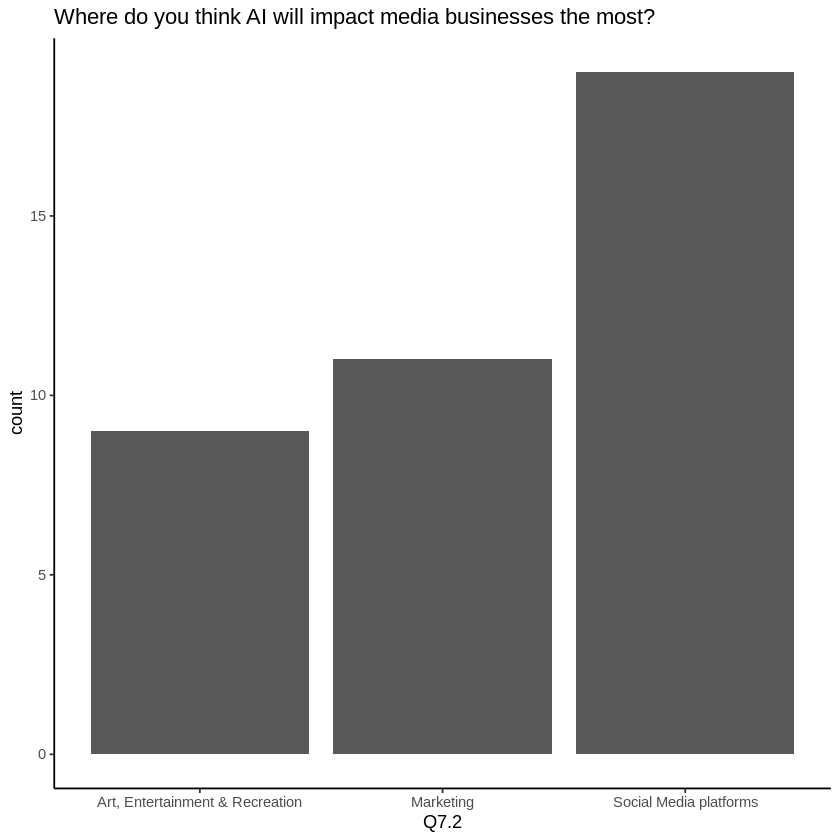

In [244]:
VQ7.2 <- ggplot(data = media, mapping = aes(Q7.2)) +
geom_bar() + theme_classic()+ ggtitle("Where do you think AI will impact media businesses the most?")

VQ7.2

#printing Count of answers
media %>% 
  count(Q7.2)

## Question number 7.3 = I agree for AI tools to be added in my domain's curriculum

New insight:
This question got only 1 Submited Answer

Q7.3,n
<chr>,<int>
,38
Strongly disagree,1


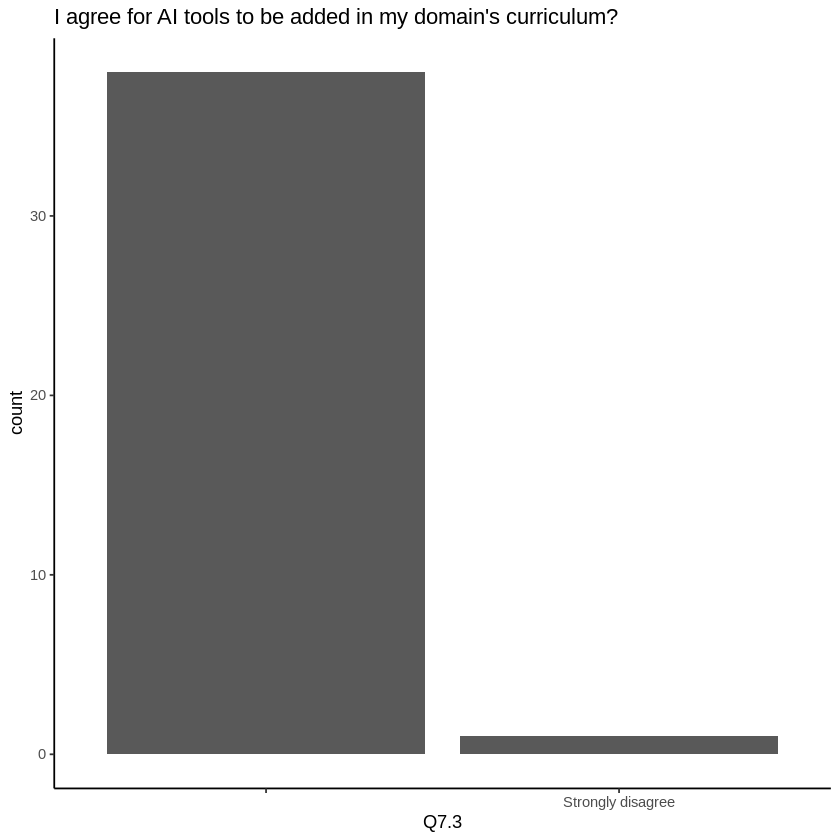

In [243]:
VQ7.3 <- ggplot(data = media, mapping = aes(Q7.3)) +
geom_bar() + theme_classic()+ ggtitle("I agree for AI tools to be added in my domain's curriculum?")

VQ7.3

media %>% 
  count(Q7.3)

##Question number 13.1 = "I am familiar with Machine Learning and Deep Learning technologies

New Insight:
39 total
agree 8
nutral 9
disagree 22

almost 73% of the 30 votes, are not aware of those terms

Q13.1,n
<chr>,<int>
,1
Neither agree nor disagree,9
Somewhat agree,7
Somewhat disagree,13
Strongly disagree,9


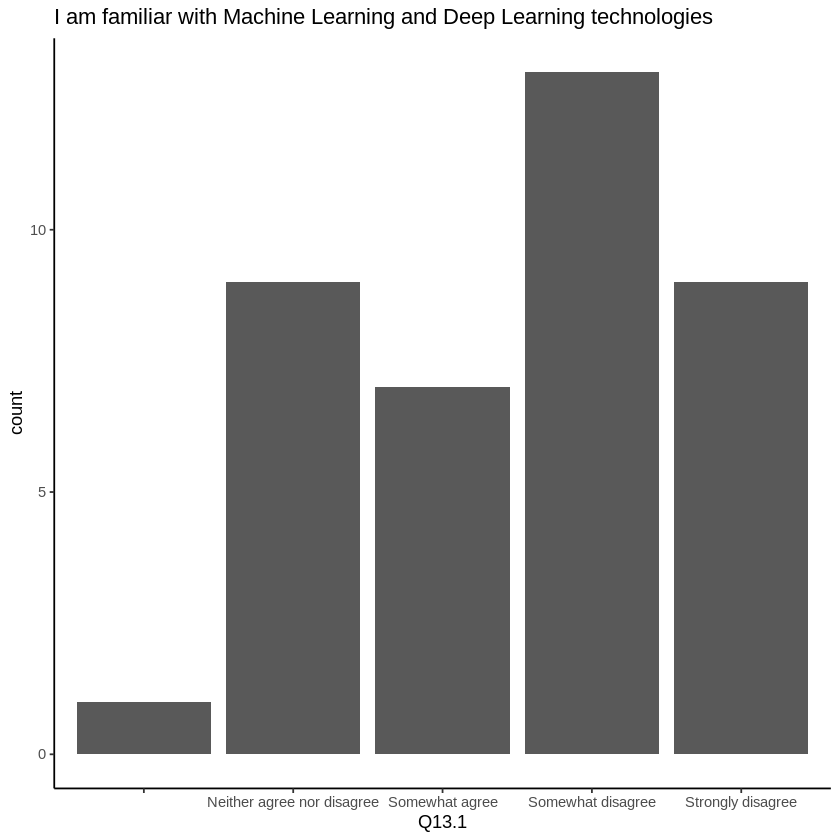

In [251]:
VQ13.1 <- ggplot(data = media, mapping = aes(Q13.1)) +
geom_bar() + theme_classic()+ ggtitle("I am familiar with Machine Learning and Deep Learning technologies")
media %>% 
  count(Q13.1)
VQ13.1

##Question number 13.2 = I am aware of AI being used in my domain

New insights: 
Agree = 27
Natural = 8 
Disagree = 4

87% of the 31 votes are aware of the use of ai in media domain


Q13.2,n
<chr>,<int>
,1
Neither agree nor disagree,8
Somewhat agree,19
Somewhat disagree,3
Strongly agree,8


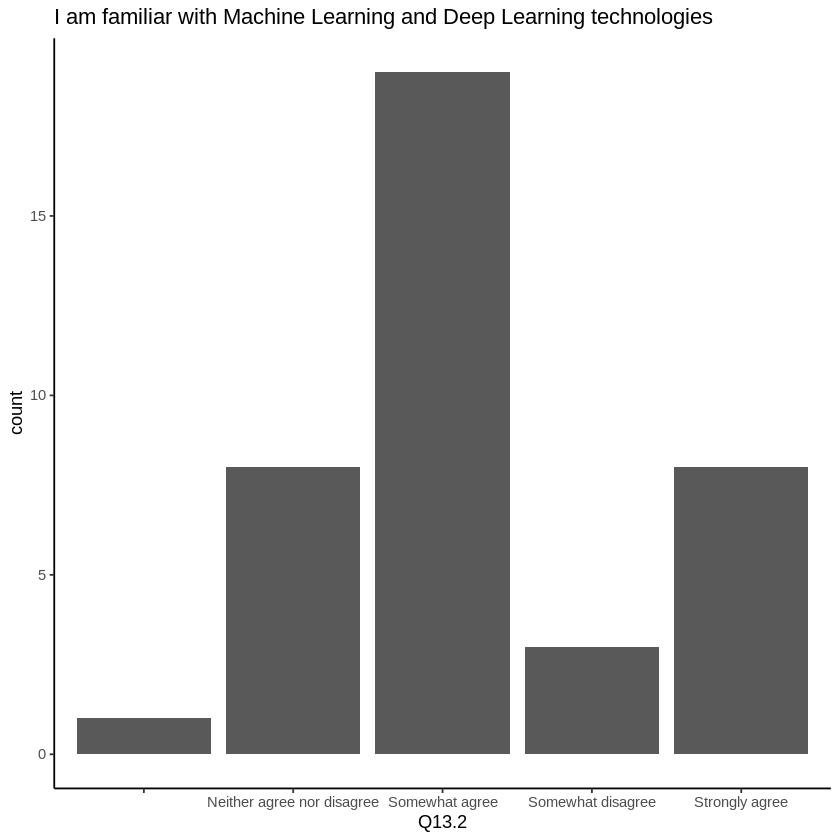

In [252]:
VQ13.2 <- ggplot(data = media, mapping = aes(Q13.2)) +
geom_bar() + theme_classic()+ ggtitle("I am aware of AI being used in my domain")
media %>% 
  count(Q13.2)
VQ13.2

##Question number 13.3 = I have taken courses related to AI in my programme

New insights: 



Q13.3,n
<chr>,<int>
,1
Neither agree nor disagree,4
Somewhat agree,1
Somewhat disagree,8
Strongly agree,3
Strongly disagree,22


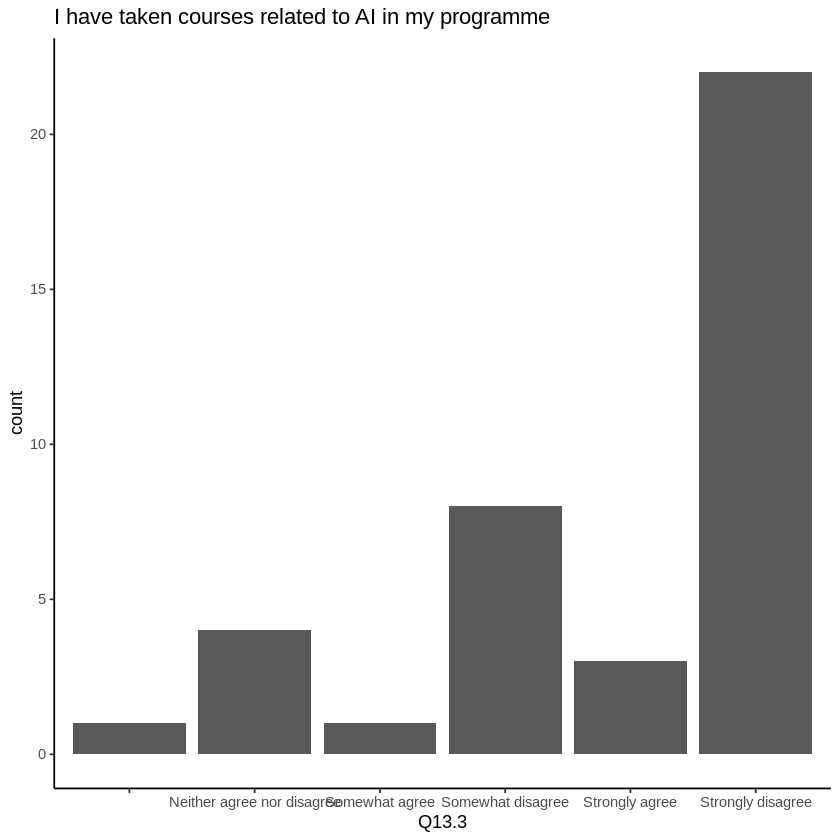

In [253]:
VQ13.3 <- ggplot(data = media, mapping = aes(Q13.3)) +
geom_bar() + theme_classic()+ ggtitle("I have taken courses related to AI in my programme")
media %>% 
  count(Q13.3)
VQ13.3

##Question number 13.4 = Are you aware that many everyday devices and applications already use AI?

New insights: 



Q13.4,n
<chr>,<int>
,1
Neither agree nor disagree,5
Somewhat agree,14
Somewhat disagree,3
Strongly agree,15
Strongly disagree,1


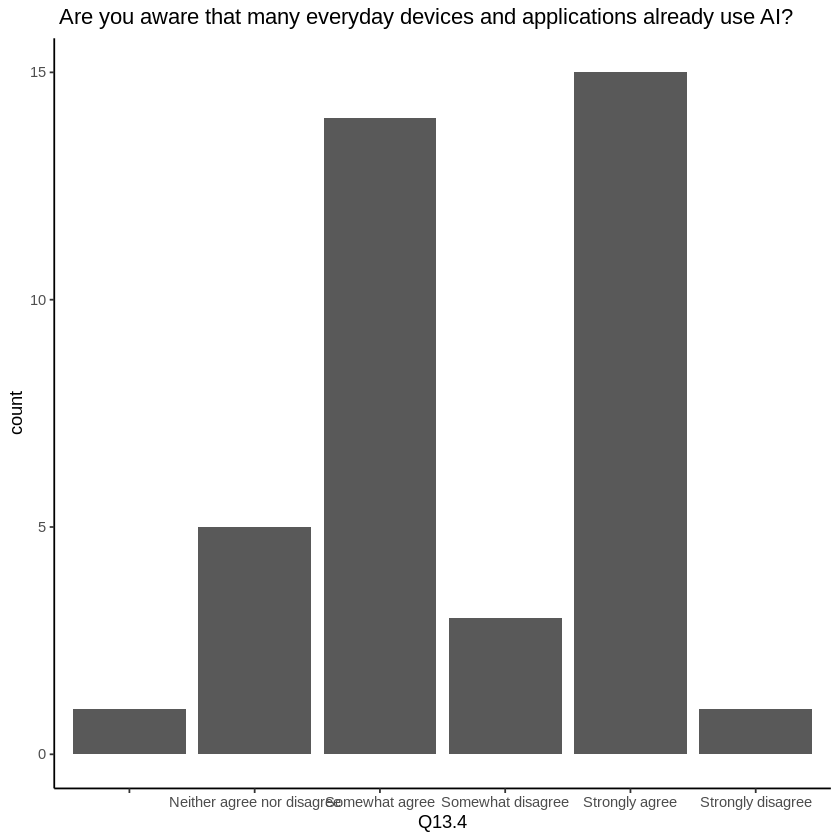

In [254]:
VQ13.4 <- ggplot(data = media, mapping = aes(Q13.4)) +
geom_bar() + theme_classic()+ ggtitle(" Are you aware that many everyday devices and applications already use AI?")
media %>% 
  count(Q13.4)
VQ13.4

##Question number 13.5 = I have used AI in my domain before

New insights: 



Q13.5,n
<chr>,<int>
,1
Neither agree nor disagree,10
Somewhat agree,6
Somewhat disagree,9
Strongly agree,2
Strongly disagree,11


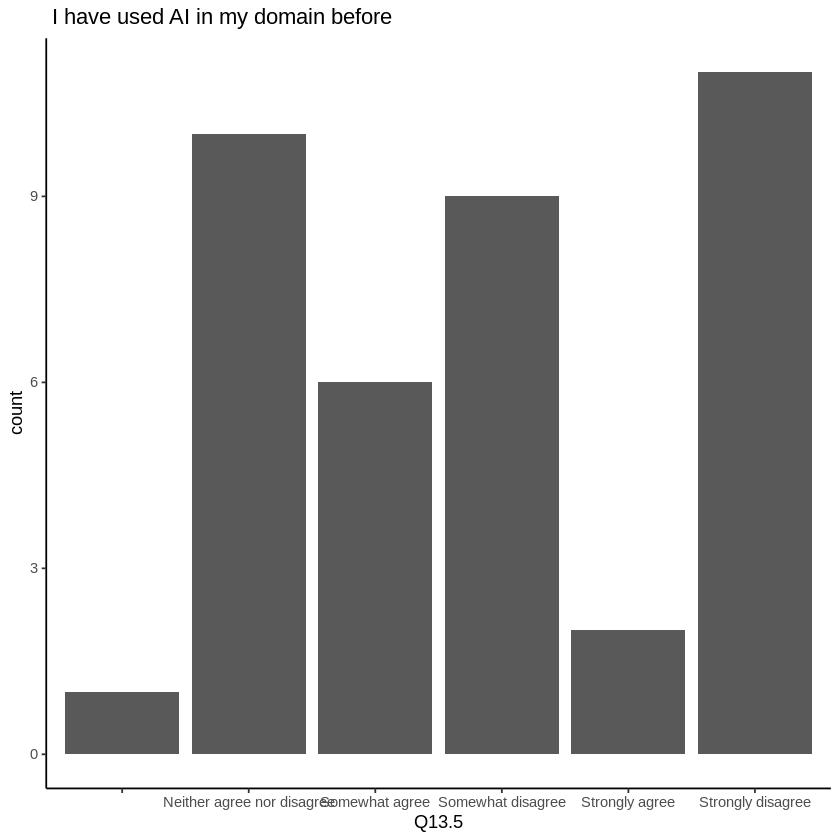

In [256]:
VQ13.5 <- ggplot(data = media, mapping = aes(Q13.5)) +
geom_bar() + theme_classic()+ ggtitle(" I have used AI in my domain before")
media %>% 
  count(Q13.5)
VQ13.5